In [1]:
import pandas as pd

Load the training data

In [2]:
data = pd.read_csv("titanic/train.csv")
print(data.head(10))

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   
5            6         0       3   
6            7         0       1   
7            8         0       3   
8            9         1       3   
9           10         1       2   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   
5                                   Moran, Mr. James    male   NaN      0   
6                            McCarthy, Mr. Timothy J    male  54

Check for missing values

In [3]:
print(data.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


Since Cabin has too many missing values, drop the Cabin column entirely.
For Age and Embarked, we can fill missing values:
- For Age: fill with the median age.
- For Embarked: fill with the mode.

In [4]:
data = data.drop('Cabin', axis=1)
data['Age'].fillna(data['Age'].median(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

print(data.isnull().sum())

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


C:\Users\pc\AppData\Local\Temp\ipykernel_7452\1214688364.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_7452\1214688364.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For examp

Logistic Regression requires numerical input features, so we need to:

- Convert categorical columns into numeric format (e.g., Sex and Embarked).
- Select the relevant features to use for training.
- Drop irrelevant columns like PassengerId, Name, and Ticket because they don’t help the prediction.

In [5]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)
data = data.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

print(data.head())

   Survived  Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0         0       3    0  22.0      1      0   7.2500       False        True
1         1       1    1  38.0      1      0  71.2833       False       False
2         1       3    1  26.0      0      0   7.9250       False        True
3         1       1    1  35.0      1      0  53.1000       False        True
4         0       3    0  35.0      0      0   8.0500       False        True


Split data into features and target

In [6]:
y = data['Survived']
X = data.drop('Survived', axis=1)

print(X.head())
print(y.head())

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0       3    0  22.0      1      0   7.2500       False        True
1       1    1  38.0      1      0  71.2833       False       False
2       3    1  26.0      0      0   7.9250       False        True
3       1    1  35.0      1      0  53.1000       False        True
4       3    0  35.0      0      0   8.0500       False        True
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


Convert boolean columns to integers

In [7]:
X['Embarked_Q'] = X['Embarked_Q'].astype(int)
X['Embarked_S'] = X['Embarked_S'].astype(int)

print(X.head())

   Pclass  Sex   Age  SibSp  Parch     Fare  Embarked_Q  Embarked_S
0       3    0  22.0      1      0   7.2500           0           1
1       1    1  38.0      1      0  71.2833           0           0
2       3    1  26.0      0      0   7.9250           0           1
3       1    1  35.0      1      0  53.1000           0           1
4       3    0  35.0      0      0   8.0500           0           1


Split the data into training and testing sets

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Training samples: {X_train.shape[0]}')
print(f'Testing samples: {X_test.shape[0]}')

Training samples: 712
Testing samples: 179


Train the Logistic Regression model

In [9]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

print("Model training complete!")

Model training complete!


Make predictions on the test set and evaluate accuracy

In [10]:
from sklearn.metrics import accuracy_score

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Accuracy on test set: {accuracy:.4f}")

Accuracy on test set: 0.8101


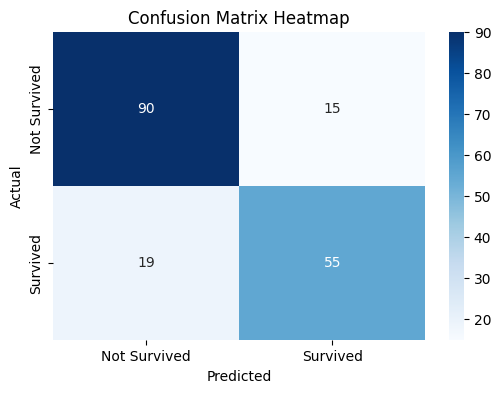

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

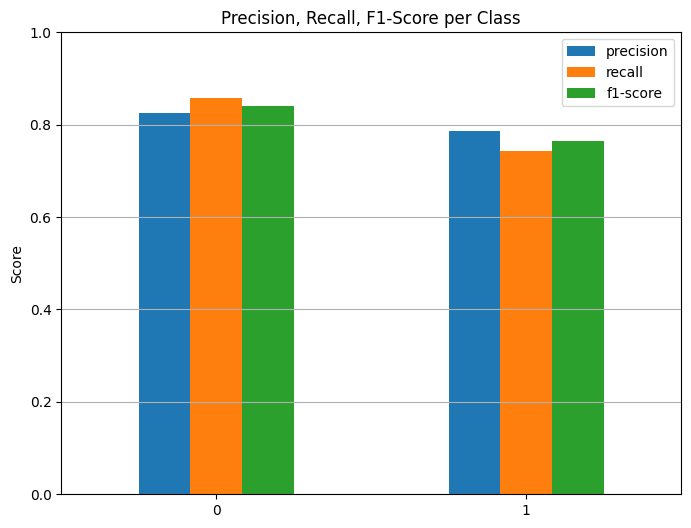

In [12]:
from sklearn.metrics import classification_report

report = classification_report(y_test, y_pred, output_dict=True)
df_report = pd.DataFrame(report).transpose()

df_plot = df_report.drop(['accuracy', 'macro avg', 'weighted avg'])

df_plot[['precision', 'recall', 'f1-score']].plot(kind='bar', figsize=(8,6))
plt.title('Precision, Recall, F1-Score per Class')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


- After loading and preprocessing, we split the data into 80% training and 20% testing sets.
- The trained model achieved an accuracy of approximately 81% on the test set, indicating it correctly predicted survival or non-survival 
for most passengers.